In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installing & Importing**

## Installing

In [ ]:
# !pip install -U scikit-learn
# !pip install pyswarms
!pip install Jinja2==3.1.2
!pip install klib
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing

In [ ]:
import numpy as np
import pandas as pd
import klib
import warnings
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from scipy.stats import mode
import matplotlib.pyplot as plt
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO
from pyswarms.utils.functions import single_obj as fx

warnings.filterwarnings('ignore')

---
# **Skenario 1: Data kosong dengan klasifikasi naive bayes**

In [ ]:
# Membaca dataset
hepatitis = pd.read_csv('/content/drive/MyDrive/Dataset/hepatitis_csv.csv')

# Variabel independen
x = hepatitis.drop (["class"], axis = 1)
x.head()

# Variabel dependen
y = hepatitis ["class"]
y.head()

cat_column = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']
num_column = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Encoding data kategorikal
cat_pipe = Pipeline([
                     ("encoder",OrdinalEncoder())
])

prepro = ColumnTransformer([
                            ("categorical", cat_pipe, cat_column)
],remainder="passthrough")

prepro.fit(x)
x_encoded = prepro.transform(x)

# Save encoded data to csv
x_pre = pd.DataFrame(x_encoded,columns=cat_column+num_column)
df_pre = x_pre.copy()
df_pre['class'] = y
df_pre.to_csv('drive/MyDrive/Dataset/hepatitis_pre.csv')

# Imput data nan jadi nol
# imp = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
# imp.fit(x_encoded)
# x_imputed = imp.transform(x_encoded)

# x_imputed_nol = pd.DataFrame(x_imputed,columns=cat_column+num_column)
# df_imputed_nol = x_imputed_nol.copy()
# df_imputed_nol[cat_column] = np.where((df_imputed_nol[cat_column] <= 0.5), 0, 1)
# df_imputed_nol['class'] = y
# df_imputed_nol.to_csv('drive/MyDrive/Dataset/hepatitis_imputed_nol.csv')

# Drop missing value
x_dropna = df_pre.copy()
x_dropna = x_dropna.dropna()
y_dropna = x_dropna['class']
x_dropna = x_dropna.drop (["class"], axis = 1)
x_dropna.to_csv('drive/MyDrive/Dataset/hepatitis_dropna.csv')

# Import train_test_split function
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_dropna, y_dropna, test_size = 0.5, random_state = 42)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_dropna, y_dropna, test_size = 0.4, random_state = 42)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_dropna, y_dropna, test_size = 0.3, random_state = 42)

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred_1 = modelnb.fit(x_train_1, y_train_1).predict(x_test_1)
y_pred_2 = modelnb.fit(x_train_2, y_train_2).predict(x_test_2)
y_pred_3 = modelnb.fit(x_train_3, y_train_3).predict(x_test_3)

# Menghitung nilai akurasi dari klasifikasi naive bayes 
print( )
print(classification_report(y_test_1, y_pred_1))
print(classification_report(y_test_2, y_pred_2))
print(classification_report(y_test_3, y_pred_3))

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print("Nilai akurasi komposisi 50:50 adalah {:.2f}%".format(metrics.accuracy_score(y_test_1, y_pred_1) * 100))
print("Nilai akurasi komposisi 60:40 adalah {:.2f}%".format(metrics.accuracy_score(y_test_2, y_pred_2) * 100))
print("Nilai akurasi komposisi 70:30 adalah {:.2f}%".format(metrics.accuracy_score(y_test_3, y_pred_3) * 100))


              precision    recall  f1-score   support

         die       0.42      0.71      0.53         7
        live       0.93      0.79      0.85        33

    accuracy                           0.78        40
   macro avg       0.67      0.75      0.69        40
weighted avg       0.84      0.78      0.80        40

              precision    recall  f1-score   support

         die       0.44      0.67      0.53         6
        live       0.91      0.81      0.86        26

    accuracy                           0.78        32
   macro avg       0.68      0.74      0.70        32
weighted avg       0.83      0.78      0.80        32

              precision    recall  f1-score   support

         die       0.40      0.50      0.44         4
        live       0.89      0.85      0.87        20

    accuracy                           0.79        24
   macro avg       0.65      0.68      0.66        24
weighted avg       0.81      0.79      0.80        24

Nilai akurasi komp

###Score AUC ROC

Nilai akurasi komposisi 50:50 adalah 84.68%


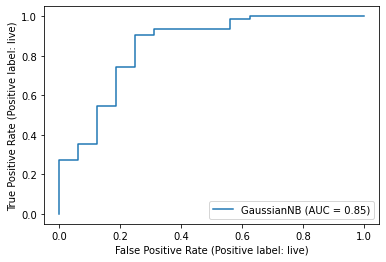

Nilai akurasi komposisi 60:40 adalah 82.74%


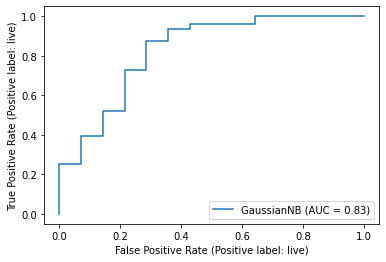

Nilai akurasi komposisi 70:30 adalah 77.49%


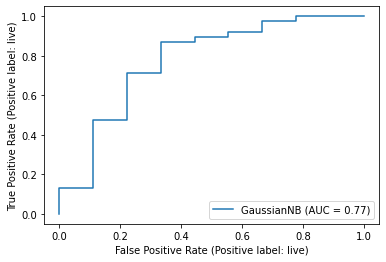

In [ ]:
# score auc roc
y_dec_1 = modelnb.fit(x_train_1, y_train_1).predict_proba(x_test_1)[:, 1]
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test_1, y_dec_1, pos_label='live')
print("Nilai auc komposisi 50:50 adalah {:.2f}%".format(auc(fpr_1, tpr_1) * 100))
metrics.plot_roc_curve(modelnb, x_test_1, y_test_1)
plt.show()

y_dec_2 = modelnb.fit(x_train_2, y_train_2).predict_proba(x_test_2)[:, 1]
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_dec_2, pos_label='live')
print("Nilai auc komposisi 60:40 adalah {:.2f}%".format(auc(fpr_2, tpr_2) * 100))
metrics.plot_roc_curve(modelnb, x_test_2, y_test_2)
plt.show()

y_dec_3 = modelnb.fit(x_train_3, y_train_3).predict_proba(x_test_3)[:, 1]
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test_3, y_dec_3, pos_label='live')
print("Nilai auc komposisi 70:30 adalah {:.2f}%".format(auc(fpr_3, tpr_3) * 100))
metrics.plot_roc_curve(modelnb, x_test_3, y_test_3)
plt.show()


---
# **Confussion matrix pada skenario 1**

## Komposisi 50:50



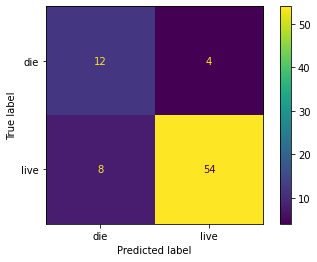

In [ ]:
disp_1 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_1, y_pred_1), display_labels=modelnb.classes_)
disp_1.plot()

## Komposisi 60:40

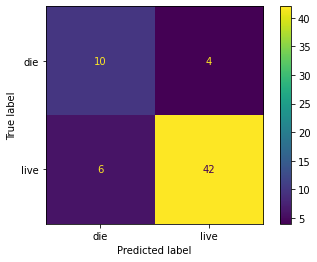

In [ ]:
disp_2 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_2, y_pred_2), display_labels=modelnb.classes_)
disp_2.plot()

## Komposisi 70:30

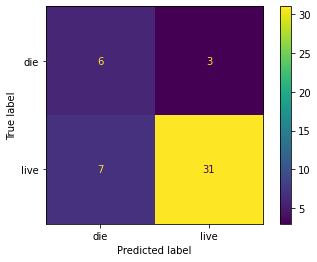

In [ ]:
disp_3 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_3, y_pred_3), display_labels=modelnb.classes_)
disp_3.plot()

---
# **Skenario 2: imputasi data kosong menggunakan missforest dengan klasifikasi naive bayes**



In [ ]:
# Membaca dataset
hepatitis = pd.read_csv('/content/drive/MyDrive/Dataset/hepatitis_pre.csv')
hepatitis.drop(hepatitis.columns[0], axis=1, inplace=True)

# Variabel independen
x = hepatitis.drop (["class"], axis = 1)

# Variabel dependen
y = hepatitis ["class"]

# Impute missforest
cat_column = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']
cat_cols = []
for i in cat_column :
    cat_cols.append(x.columns.to_list().index(i))
imputer = MissForest(random_state=42)
x_imputed = imputer.fit_transform(x, cat_vars=cat_cols)


# Save imputed data to csv
df_imputed = pd.DataFrame(x_imputed,columns=x.columns)
# df_imputed[cat_column] = np.where((df_imputed[cat_column] <= 0.5), 0, 1)
df_imputed['class'] = y
df_imputed.to_csv('drive/MyDrive/Dataset/hepatitis_imputed_missforest.csv')

# Import train_test_split function
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df_imputed.drop (["class"], axis = 1), y, test_size = 0.5, random_state = 42)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_imputed.drop (["class"], axis = 1), y, test_size = 0.4, random_state = 42)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(df_imputed.drop (["class"], axis = 1), y, test_size = 0.3, random_state = 42)

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred_1 = modelnb.fit(x_train_1, y_train_1).predict(x_test_1)
y_pred_2 = modelnb.fit(x_train_2, y_train_2).predict(x_test_2)
y_pred_3 = modelnb.fit(x_train_3, y_train_3).predict(x_test_3)

# Menghitung nilai akurasi dari klasifikasi naive bayes 
print( )
print(classification_report(y_test_1, y_pred_1))
print(classification_report(y_test_2, y_pred_2))
print(classification_report(y_test_3, y_pred_3))

# Menampilkan nilai akurasi dari klasifikasi naive bayes
print( )
print("Nilai akurasi komposisi 50:50 adalah {:.2f}%".format(metrics.accuracy_score(y_test_1, y_pred_1) * 100))
print("Nilai akurasi komposisi 60:40 adalah {:.2f}%".format(metrics.accuracy_score(y_test_2, y_pred_2) * 100))
print("Nilai akurasi komposisi 70:30 adalah {:.2f}%".format(metrics.accuracy_score(y_test_3, y_pred_3) * 100))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4

              precision    recall  f1-score   support

         die       0.68      0.81      0.74        16
        live       0.95      0.90      0.93        62

    accuracy                           0.88        78
   macro avg       0.82      0.86      0.83        78
weighted avg       0.89      0.88      0.89        78

              precision    recall  f1-score   support

         die       0.73      0.79      0.76        14
        live       0.94      0.92      0.93        48

    accuracy                           0.89        62
   macro avg       0.83      0.85      0.84        62
weighted avg       0.89      0.89      0.89        62

              precision    recall  f1-score   support

         die       0.58      0.78      0.67         9
        live       0.94      0.87      0.90        38

    accuracy                           0.85        47
   macro avg       0.76      0.82      0.79        47
weighted

Nilai akurasi komposisi 50:50 adalah 86.79%


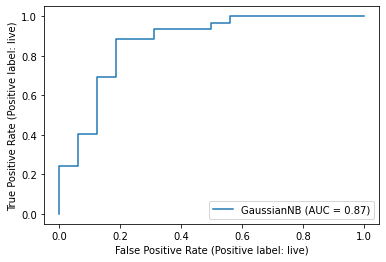

Nilai akurasi komposisi 60:40 adalah 86.16%


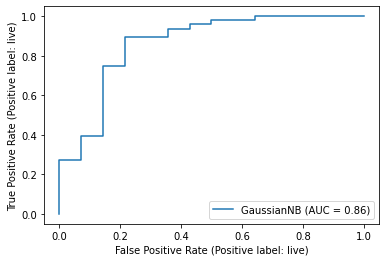

Nilai akurasi komposisi 70:30 adalah 87.13%


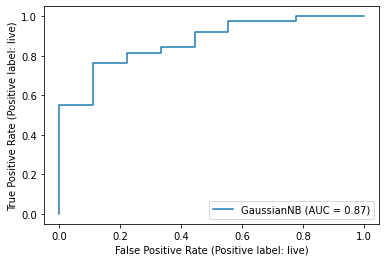

In [ ]:
# score auc roc
y_dec_1 = modelnb.fit(x_train_1, y_train_1).predict_proba(x_test_1)[:, 1]
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test_1, y_dec_1, pos_label='live')
print("Nilai auc komposisi 50:50 adalah {:.2f}%".format(auc(fpr_1, tpr_1) * 100))
metrics.plot_roc_curve(modelnb, x_test_1, y_test_1)
plt.show()

y_dec_2 = modelnb.fit(x_train_2, y_train_2).predict_proba(x_test_2)[:, 1]
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_dec_2, pos_label='live')
print("Nilai auc komposisi 60:40 adalah {:.2f}%".format(auc(fpr_2, tpr_2) * 100))
metrics.plot_roc_curve(modelnb, x_test_2, y_test_2)
plt.show()

y_dec_3 = modelnb.fit(x_train_3, y_train_3).predict_proba(x_test_3)[:, 1]
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test_3, y_dec_3, pos_label='live')
print("Nilai auc komposisi 70:30 adalah {:.2f}%".format(auc(fpr_3, tpr_3) * 100))
metrics.plot_roc_curve(modelnb, x_test_3, y_test_3)
plt.show()

---
# **Confussion matrix pada skenario 2**

## Komposisi 50:50

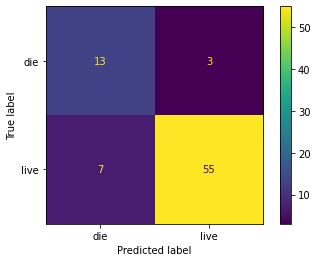

In [ ]:
disp_1 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_1, y_pred_1), display_labels=modelnb.classes_)
disp_1.plot()

## Komposisi 60:40





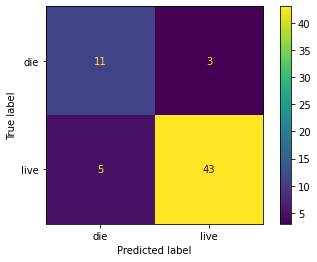

In [ ]:
disp_2 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_2, y_pred_2), display_labels=modelnb.classes_)
disp_2.plot()

## Komposisi 70:30


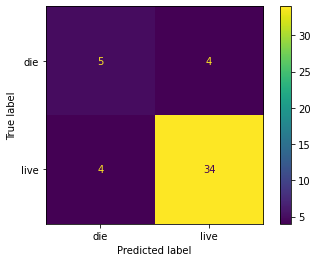

In [ ]:
disp_3 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_3, y_pred_3), display_labels=modelnb.classes_)
disp_3.plot()

In [ ]:
hepatitis

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,age,bilirubin,alk_phosphate,sgot,albumin,protime,class
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,85.0,18.0,4.0,NaN,live
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.9,135.0,42.0,3.5,NaN,live
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.7,96.0,32.0,4.0,NaN,live
3,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.7,46.0,52.0,4.0,80.0,live
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,1.0,NaN,200.0,4.0,NaN,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,46.0,7.6,NaN,242.0,3.3,50.0,die
151,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,44.0,0.9,126.0,142.0,4.3,NaN,live
152,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,61.0,0.8,75.0,20.0,4.1,NaN,live
153,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,53.0,1.5,81.0,19.0,4.1,48.0,live


---
#Testing

In [ ]:
hepatitis.dtypes

sex                float64
steroid            float64
antivirals         float64
fatigue            float64
malaise            float64
anorexia           float64
liver_big          float64
liver_firm         float64
spleen_palpable    float64
spiders            float64
ascites            float64
varices            float64
histology          float64
age                float64
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
class               object
dtype: object

In [ ]:
df_imputed_nol

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,age,bilirubin,alk_phosphate,sgot,albumin,protime,class
0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,1.0,85.0,18.0,4.0,0.0,live
1,0,0,0,1,0,0,0,0,0,0,0,0,0,50.0,0.9,135.0,42.0,3.5,0.0,live
2,0,1,0,1,0,0,1,0,0,0,0,0,0,78.0,0.7,96.0,32.0,4.0,0.0,live
3,0,0,1,0,0,0,1,0,0,0,0,0,0,31.0,0.7,46.0,52.0,4.0,80.0,live
4,0,1,0,0,0,0,1,0,0,0,0,0,0,34.0,1.0,0.0,200.0,4.0,0.0,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,1,0,1,1,1,1,0,0,1,1,1,1,46.0,7.6,0.0,242.0,3.3,50.0,die
151,0,1,0,1,0,0,1,1,0,0,0,0,1,44.0,0.9,126.0,142.0,4.3,0.0,live
152,0,0,0,1,1,0,0,1,0,1,0,0,1,61.0,0.8,75.0,20.0,4.1,0.0,live
153,1,0,0,1,0,0,1,0,1,1,0,1,1,53.0,1.5,81.0,19.0,4.1,48.0,live


In [ ]:
df_imputed

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,age,bilirubin,alk_phosphate,sgot,albumin,protime,class
0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,1.0,85.00,18.0,4.0,86.88,live
1,0,0,0,1,0,0,0,0,0,0,0,0,0,50.0,0.9,135.00,42.0,3.5,54.99,live
2,0,1,0,1,0,0,1,0,0,0,0,0,0,78.0,0.7,96.00,32.0,4.0,73.53,live
3,0,1,1,0,0,0,1,0,0,0,0,0,0,31.0,0.7,46.00,52.0,4.0,80.00,live
4,0,1,0,0,0,0,1,0,0,0,0,0,0,34.0,1.0,75.42,200.0,4.0,67.74,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,1,0,1,1,1,1,0,0,1,1,1,1,46.0,7.6,136.80,242.0,3.3,50.00,die
151,0,1,0,1,0,0,1,1,0,0,0,0,1,44.0,0.9,126.00,142.0,4.3,64.60,live
152,0,0,0,1,1,0,0,1,0,1,0,0,1,61.0,0.8,75.00,20.0,4.1,80.09,live
153,1,0,0,1,0,0,1,0,1,1,0,1,1,53.0,1.5,81.00,19.0,4.1,48.00,live


In [ ]:
klib.missingval_plot(df_imputed)

No missing values found in the dataset.


In [ ]:
hepatitis.isnull().sum()

sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
histology           0
age                 0
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
class               0
dtype: int64

In [ ]:
# !pip install scikit-learn==0.22.2
# !pip install missingpy
# !pip install klib

In [ ]:
# Membaca dataset
hepatitis = pd.read_csv('/content/drive/MyDrive/Dataset/hepatitis_pre.csv')
hepatitis.drop(hepatitis.columns[0], axis=1, inplace=True)

# Variabel independen
x = hepatitis.drop (["class"], axis = 1)

# Variabel dependen
y = hepatitis ["class"]

# Impute missforest
cat_column = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']
cat_cols = []
for i in cat_column :
    cat_cols.append(x.columns.to_list().index(i))
imputer = MissForest(random_state=42)
x_imputed = imputer.fit_transform(x, cat_vars=cat_cols)

# Save imputed data to csv
df_imputed = pd.DataFrame(x_imputed,columns=x.columns)
# df_imputed[cat_column] = np.where((df_imputed[cat_column] <= 0.5), 0, 1)
df_imputed['class'] = y
df_imputed.to_csv('drive/MyDrive/Dataset/hepatitis_imputed_missforest.csv')

# Import train_test_split function
from sklearn.model_selection import train_test_split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df_imputed.drop (["class"], axis = 1), y, test_size = 0.5, random_state = 42)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_imputed.drop (["class"], axis = 1), y, test_size = 0.4, random_state = 42)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(df_imputed.drop (["class"], axis = 1), y, test_size = 0.3, random_state = 42)

# Mengaktifkan/memanggil/membuat fungsi klasifikasi SVM
SVM = SVC(probability=True)

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()

# Mengaktifkan/memanggil/membuat fungsi klasifikasi RandomForest
RF = RandomForestClassifier(random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Memasukkan data training pada fungsi klasifikasi SVM
y_pred_1 = SVM.fit(x_train_1, y_train_1).predict(x_test_1)
y_pred_2 = SVM.fit(x_train_2, y_train_2).predict(x_test_2)
y_pred_3 = SVM.fit(x_train_3, y_train_3).predict(x_test_3)

# Memasukkan data training pada fungsi klasifikasi naive bayes
y_pred_4 = modelnb.fit(x_train_1, y_train_1).predict(x_test_1)
y_pred_5 = modelnb.fit(x_train_2, y_train_2).predict(x_test_2)
y_pred_6 = modelnb.fit(x_train_3, y_train_3).predict(x_test_3)

# Memasukkan data training pada fungsi klasifikasi random forest
y_pred_7 = RF.fit(x_train_1, y_train_1).predict(x_test_1)
y_pred_8 = RF.fit(x_train_2, y_train_2).predict(x_test_2)
y_pred_9 = RF.fit(x_train_3, y_train_3).predict(x_test_3)

print( )
print("SVM Accuracy Score 50:50 -> {:.2f}%".format(metrics.accuracy_score(y_pred_1, y_test_1)*100))
print("SVM Accuracy Score 60:40 -> {:.2f}%".format(metrics.accuracy_score(y_pred_2, y_test_2)*100))
print("SVM Accuracy Score 70:30 -> {:.2f}%".format(metrics.accuracy_score(y_pred_3, y_test_3)*100))
print( )
print("NB Accuracy Score 50:50 -> {:.2f}%".format(metrics.accuracy_score(y_pred_4, y_test_1)*100))
print("NB Accuracy Score 60:40 -> {:.2f}%".format(metrics.accuracy_score(y_pred_5, y_test_2)*100))
print("NB Accuracy Score 70:30 -> {:.2f}%".format(metrics.accuracy_score(y_pred_6, y_test_3)*100))
# print( )
# print("RF Accuracy Score 50:50 -> {:.2f}%".format(metrics.accuracy_score(y_pred_7, y_test_1)*100))
# print("RF Accuracy Score 60:40 -> {:.2f}%".format(metrics.accuracy_score(y_pred_8, y_test_2)*100))
# print("RF Accuracy Score 70:30 -> {:.2f}%".format(metrics.accuracy_score(y_pred_9, y_test_3)*100))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3

SVM Accuracy Score 50:50 -> 79.49%
SVM Accuracy Score 60:40 -> 77.42%
SVM Accuracy Score 70:30 -> 80.85%

NB Accuracy Score 50:50 -> 87.18%
NB Accuracy Score 60:40 -> 87.10%
NB Accuracy Score 70:30 -> 82.98%


Nilai auc komposisi 50:50 adalah 72.48%


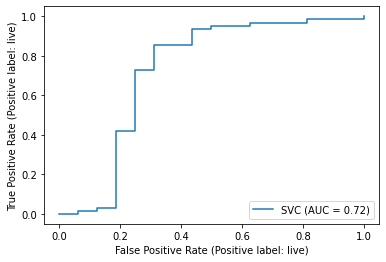

Nilai auc komposisi 60:40 adalah 70.54%


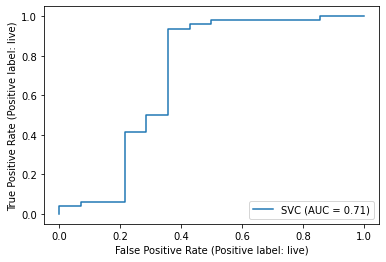

Nilai auc komposisi 70:30 adalah 76.32%


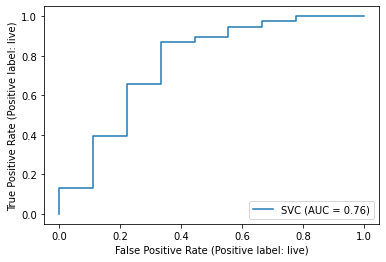

Nilai auc komposisi 50:50 adalah 86.79%


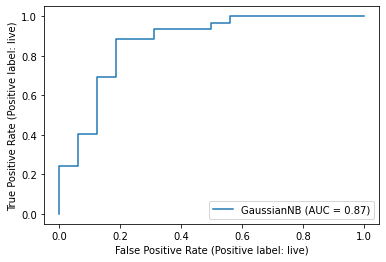

Nilai auc komposisi 60:40 adalah 86.16%


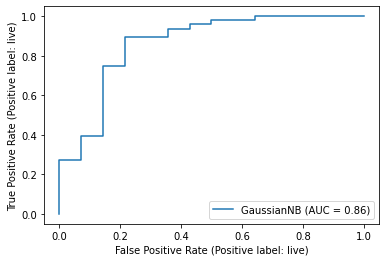

Nilai auc komposisi 70:30 adalah 87.13%


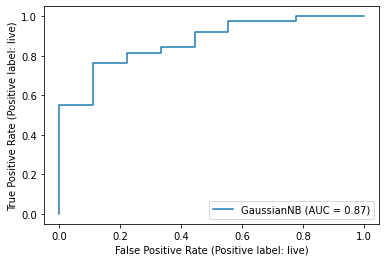

In [ ]:
# score auc svm
y_dec_1 = SVM.fit(x_train_1, y_train_1).predict_proba(x_test_1)[:, 1]
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test_1, y_dec_1, pos_label='live')
print("Nilai auc SVM komposisi 50:50 adalah {:.2f}%".format(auc(fpr_1, tpr_1) * 100))
metrics.plot_roc_curve(SVM, x_test_1, y_test_1)
plt.show()

y_dec_2 = SVM.fit(x_train_2, y_train_2).predict_proba(x_test_2)[:, 1]
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_dec_2, pos_label='live')
print("Nilai auc SVM komposisi 60:40 adalah {:.2f}%".format(auc(fpr_2, tpr_2) * 100))
metrics.plot_roc_curve(SVM, x_test_2, y_test_2)
plt.show()

y_dec_3 = SVM.fit(x_train_3, y_train_3).predict_proba(x_test_3)[:, 1]
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test_3, y_dec_3, pos_label='live')
print("Nilai auc SVM komposisi 70:30 adalah {:.2f}%".format(auc(fpr_3, tpr_3) * 100))
metrics.plot_roc_curve(SVM, x_test_3, y_test_3)
plt.show()

# scor auc nb
y_dec_4 = modelnb.fit(x_train_1, y_train_1).predict_proba(x_test_1)[:, 1]
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test_1, y_dec_4, pos_label='live')
print("Nilai auc NB komposisi 50:50 adalah {:.2f}%".format(auc(fpr_1, tpr_1) * 100))
metrics.plot_roc_curve(modelnb, x_test_1, y_test_1)
plt.show()

y_dec_5 = modelnb.fit(x_train_2, y_train_2).predict_proba(x_test_2)[:, 1]
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_dec_5, pos_label='live')
print("Nilai auc NB komposisi 60:40 adalah {:.2f}%".format(auc(fpr_2, tpr_2) * 100))
metrics.plot_roc_curve(modelnb, x_test_2, y_test_2)
plt.show()

y_dec_6 = modelnb.fit(x_train_3, y_train_3).predict_proba(x_test_3)[:, 1]
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test_3, y_dec_6, pos_label='live')
print("Nilai auc NB komposisi 70:30 adalah {:.2f}%".format(auc(fpr_3, tpr_3) * 100))
metrics.plot_roc_curve(modelnb, x_test_3, y_test_3)
plt.show()